# Part 4 - Cluster Metro Areas
In this notebook, I will use KMeans to cluster the location data.  

<table style="width:100%">
    <tr>
        <td style="text-align: left">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Explore%20Location%20Data.ipynb">&larr; Part 3</a>
            </h2>
        </td>
        <td style="text-align: right">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Explore%20the%20Clusters.ipynb">Part 5 &rarr;</a>
            </h2>
        </td>
    </tr>
</table>

In [1]:
#import libraries
import requests
import numpy as np
import pandas as pd
import ibm_boto3
import io
from sklearn.cluster import KMeans

In [2]:
# import plotting libraries
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
#Import the first venue dataframe
obj = resource.Object(bucket_name=bucket, key='VenueData.json').get()
df = pd.read_json(io.BytesIO(obj['Body'].read()))
df.sort_index(inplace=True)
df.head()

,Metropolitan,Country,Continent,Latitude,Longitude,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,Tokyo,Japan,Asia,35.682839,139.759455,Café,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Lounge,Garden,French Restaurant,Dessert Shop,Thai Restaurant,Steakhouse
1,Delhi,India,Asia,28.651718,77.221939,Indian Restaurant,Bar,Café,Flea Market,Lounge,Asian Restaurant,Ice Cream Shop,South Indian Restaurant,Portuguese Restaurant,Plaza
2,Mexico City,Mexico,North America,19.432601,-99.133342,Mexican Restaurant,Art Museum,Museum,Arts & Crafts Store,Bar,Ice Cream Shop,Boutique,Bakery,Restaurant,Café
3,São Paulo,Brazil,South America,-23.550651,-46.633382,Japanese Restaurant,Brazilian Restaurant,Café,Bakery,Snack Place,Bookstore,Plaza,Cosmetics Shop,Chinese Restaurant,Art Gallery
4,Lagos,Nigeria,Africa,6.455057,3.394179,Lounge,African Restaurant,Bar,Café,Pizza Place,Market,Art Gallery,Italian Restaurant,Hotel,Shopping Mall


In [14]:
#Import the venue dataframe used for clustering
obj = resource.Object(bucket_name=bucket, key='VenueOneHot.json').get()
df_onehot = pd.read_json(io.BytesIO(obj['Body'].read()))
df_onehot.head()

,Metro,Acai House,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Amphitheater,Antique Shop,Arepa Restaurant,...,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Yoshoku Restaurant,Zhejiang Restaurant,Zoo Exhibit
0,Ahmedabad,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,Alexandria,0.0,0.0,0.0,0.0,0.0,0.010101,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
10,Berlin/Brandenburg,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
11,Bogotá,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.01,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
12,Boston,0.0,0.0,0.0,0.0,0.0,0.030000,0.0,0.0,0.00,...,0.0,0.0,0.01,0.0,0.0,0.0,0.02,0.0,0.0,0.0


### Find the cost for k values from 1 to 20 to determine the best k to use for KMeans clustering

In [6]:
# Find the best K for KMeans
cost_vals = []
for k in range(1,21):
    model = KMeans(n_clusters=k).fit(df_onehot.drop('Metro',axis=1))
    cost_vals.append(model.inertia_)
    print('k:',k,' cost:', cost_vals[k-1])


k: 1  cost: 5.963953461200677
k: 2  cost: 5.097149273075528
k: 3  cost: 4.805283390440098
k: 4  cost: 4.416431460631443
k: 5  cost: 4.142218364274676
k: 6  cost: 3.881198403118715
k: 7  cost: 3.6486735467694706
k: 8  cost: 3.5618958328722963
k: 9  cost: 3.3472816848257434
k: 10  cost: 3.122555786315985
k: 11  cost: 3.0148899709977997
k: 12  cost: 2.9530993684955185
k: 13  cost: 2.7534583161194455
k: 14  cost: 2.5562600643097877
k: 15  cost: 2.544793634932117
k: 16  cost: 2.4487955583067884
k: 17  cost: 2.2849393611402817
k: 18  cost: 2.2542092805407528
k: 19  cost: 2.1963587600025987
k: 20  cost: 2.0410447547526345


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,5.963953,5.097149,4.805283,4.416431,4.142218,3.881198,3.648674,3.561896,3.347282,3.122556,3.01489,2.953099,2.753458,2.55626,2.544794,2.448796,2.284939,2.254209,2.196359,2.041045


<function matplotlib.pyplot.show(*args, **kw)>

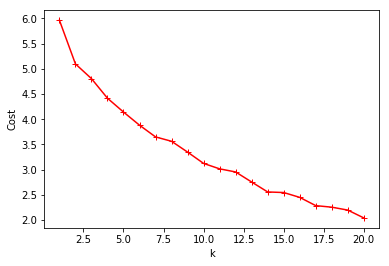

In [7]:
display(pd.DataFrame([cost_vals],columns=range(1,21)))
plt.plot(range(1,21),cost_vals,'r+-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.show

There does not appear to be a clear 'elbow' in the graph. We are looking for a k value where the rate of decreasing cost slows down significantly.  
Options for possible 'elbow' points are k=2, k=10, k=14 and k=17.
After running the test several times and examining the cluster sizes, k=14 seems to be a consistant option and a good choice for k.

In [12]:
#Run the algorithm with chosen k value and examine the size of each cluster
k=14
model = KMeans(n_clusters=k).fit(df_onehot.drop('Metro',axis=1))
w = pd.DataFrame({'cat':model.labels_,'size':range(100)})
w.groupby('cat', as_index=False).count()

,cat,size
0,0,17
1,1,13
2,2,32
3,3,8
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


In [15]:
df_onehot.insert(0, 'Cluster Labels', model.labels_)
df_onehot

,Cluster Labels,Metro,Acai House,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Amphitheater,Antique Shop,...,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Yoshoku Restaurant,Zhejiang Restaurant,Zoo Exhibit
0,3,Ahmedabad,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000
1,0,Alexandria,0.00,0.00,0.0,0.00,0.0,0.010101,0.00,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000
10,2,Berlin/Brandenburg,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000
11,2,Bogotá,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000
12,2,Boston,0.00,0.00,0.0,0.00,0.0,0.030000,0.00,0.00,...,0.000000,0.00,0.010000,0.0,0.00,0.000000,0.02,0.0000,0.000000,0.000000
13,11,Buenos Aires,0.00,0.00,0.0,0.00,0.0,0.000000,0.01,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000
14,11,Busan,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000
15,0,Cairo,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000
16,2,Caracas,0.00,0.00,0.0,0.00,0.0,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000
17,4,Changzhou,0.00,0.00,0.0,0.00,0.0,0.200000,0.00,0.00,...,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.000000


In [24]:
dftemp = df_onehot.iloc[:,[0,1]]
#dftemp
df_New = df.join(dftemp.set_index('Metro'), on='Metropolitan')
df_New

,Metropolitan,Country,Continent,Latitude,Longitude,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Cluster Labels
0,Tokyo,Japan,Asia,35.682839,139.759455,Café,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Lounge,Garden,French Restaurant,Dessert Shop,Thai Restaurant,Steakhouse,0
1,Delhi,India,Asia,28.651718,77.221939,Indian Restaurant,Bar,Café,Flea Market,Lounge,Asian Restaurant,Ice Cream Shop,South Indian Restaurant,Portuguese Restaurant,Plaza,3
2,Mexico City,Mexico,North America,19.432601,-99.133342,Mexican Restaurant,Art Museum,Museum,Arts & Crafts Store,Bar,Ice Cream Shop,Boutique,Bakery,Restaurant,Café,11
3,São Paulo,Brazil,South America,-23.550651,-46.633382,Japanese Restaurant,Brazilian Restaurant,Café,Bakery,Snack Place,Bookstore,Plaza,Cosmetics Shop,Chinese Restaurant,Art Gallery,2
4,Lagos,Nigeria,Africa,6.455057,3.394179,Lounge,African Restaurant,Bar,Café,Pizza Place,Market,Art Gallery,Italian Restaurant,Hotel,Shopping Mall,11
5,Mumbai,India,Asia,18.938771,72.835335,Indian Restaurant,Café,Bakery,Seafood Restaurant,Bar,Chinese Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Pizza Place,3
6,Cairo,Egypt,Africa,30.048819,31.243666,Café,Lounge,Middle Eastern Restaurant,Italian Restaurant,Theater,Egyptian Restaurant,Lebanese Restaurant,Coffee Shop,Hotel Bar,Boat or Ferry,0
7,Kyoto,Japan,Asia,35.021041,135.755607,Café,Japanese Restaurant,Bakery,Sake Bar,Dessert Shop,Palace,Ramen Restaurant,Soba Restaurant,Coffee Shop,Donburi Restaurant,0
8,Wuhan,China,Asia,30.595105,114.299935,Shopping Mall,Park,Chinese Restaurant,Department Store,Asian Restaurant,Beer Garden,Coffee Shop,Hubei Restaurant,Movie Theater,Pedestrian Plaza,1
9,Los Angeles,United States,North America,34.053691,-118.242767,Bar,Coffee Shop,Sushi Restaurant,Plaza,Mexican Restaurant,Ice Cream Shop,Ramen Restaurant,Sandwich Place,Seafood Restaurant,Mediterranean Restaurant,11


In [25]:
#Save dataframe to json file
resource.Bucket(name=bucket).put_object(Key='VenueDataWithClusters.json', Body=df_New.to_json())
print('Saved')

Saved


<table style="width:100%">
    <tr>
        <td style="text-align: left">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Explore%20Location%20Data.ipynb">&larr; Part 3</a>
            </h2>
        </td>
        <td style="text-align: right">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Explore%20the%20Clusters.ipynb">Part 5 &rarr;</a>
            </h2>
        </td>
    </tr>
</table>